In [1]:
#Import numpy
import numpy as np

#Import scikitlearn for machine learning functionalities
import sklearn
from sklearn.manifold import TSNE 
from sklearn.datasets import load_digits # For the UCI ML handwritten digits dataset

# Import matplotlib for plotting graphs ans seaborn for attractive graphics.
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
%matplotlib inline

import seaborn as sb

In [2]:
digits = load_digits()
print(digits.data.shape) # There are 10 classes (0 to 9) with alomst 180 images in each class 
                         # The images are 8x8 and hence 64 pixels(dimensions)
# plt.gray();
# #Displaying what the standard images look like
# for i in range(0,10):
#     plt.matshow(digits.images[i]) 
#     plt.show()

(1797, 64)


In [3]:
X = np.vstack([digits.data[digits.target==i] for i in range(10)]) # Place the arrays of data of each digit on top of each other and store in X
Y = np.hstack([digits.target[digits.target==i] for i in range(10)]) # Place the arrays of data of each target digit by the side of each other continuosly and store in Y

#Implementing the TSNE Function - ah Scikit learn makes it so easy!
digits_final = TSNE(perplexity=30).fit_transform(X) 
#Play around with varying the parameters like perplexity, random_state to get different plots

In [4]:
print(X.shape)
print(Y.shape)
print(Y[-10:])

(1797, 64)
(1797,)
[9 9 9 9 9 9 9 9 9 9]


In [5]:
#With the above line, our job is done. But why did we even reduce the dimensions in the first place?
#To visualise it on a graph.

#So, here is a utility function that helps to do a scatter plot of thee transformed data 
# from tutils.timg.tsne_2 import plot

def plot2(x, colors):
  
    palette = np.array(sb.color_palette("hls", 10))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    # plt.title("t-sne")
    ax = plt.subplot(aspect='equal')
    ax.title.set_text('t-sne')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts

<ipython-input-5-42dce8fbf50f>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:title={'center':'t-sne'}>,
 [Text(14.345372, -58.168472, '0'),
  Text(-6.2034626, 20.97514, '1'),
  Text(-50.20791, -3.9543993, '2'),
  Text(-17.300577, -25.733513, '3'),
  Text(14.735436, 55.89744, '4'),
  Text(25.012701, 3.9237823, '5'),
  Text(54.790348, -9.627572, '6'),
  Text(-26.883148, 42.19852, '7'),
  Text(-14.22842, 2.6954198, '8'),
  Text(5.363666, -18.687588, '9')])

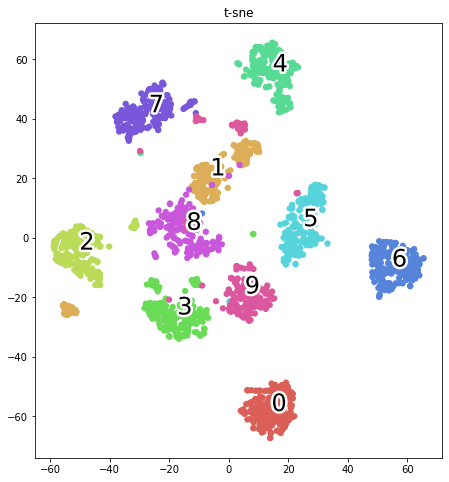

In [6]:
plot2(digits_final, Y)

In [7]:
plot(digits_final, Y)